Al parque de deportes extremos Power Rockets, cuyo creador es el famoso skater Johnny Falcon, llegan skaters con un tiempo entre arribos (en horas) que se distribuye de acuerdo con la función de densidad de probabilidad:

![](Llegada.png)

Inmediatamente después de su llegada, todos los skaters visitan la nueva atracción: La Gran Rampa. Se sabe que el tiempo que los skaters duran en La Gran Rampa se distribuye de acuerdo con la siguiente distribución de probabilidad, en minutos:

![](Atraccion.png)

Debido a la complejidad de las piruetas, solamente un skater puede estar utilizando La Gran Rampa a la vez. Una vez terminan su turno, estos se dirigen a otras áreas del parque.

Modele la entrada al parque y el uso de La Gran Rampa utilizando SIMIO.

a. Genere en Excel y cargue en SIMIO, 100 realizaciones de la variable tiempo de arribos, por el método de transformada inversa. (35 puntos)

b. Genere en Excel y cargue en SIMIO, 100 realizaciones de la variable tiempo de uso de La Gran Rampa, por el método de aceptación y rechazo cuya función techo en constante y maximiza la probabilidad general de aceptación. (35 puntos)

c. Corra el modelo hasta que todos los skaters vayan a otras áreas del parque. Realice una simulación con 30 réplicas, sin periodo de calentamiento. (30 puntos)

Entregables: cargue tanto el modelo en Simio como el archivo Excel en el que se encuentran las variables generadas comprimidos en una carpeta .zip. NO se calificará su ejercicio si lo envía en otro formato.En el archivo .zip asegúrese de cargar el archivo de Excel en formato .xlsx, pues si se envía en formato .csv se pierden las fórmulas. NO debe subir archivos adicionales (Word, PDF, entre otros).

In [4]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

# Llegada

Las primeras 10 variables aleatorias con distribución exponencial:
[1.98171270e-02 4.17770988e-02 1.11109957e-02 8.62733052e-03
 8.94169806e-03 9.58975100e-02 3.18942912e-02 1.68598046e-02
 3.10256666e-05 4.79549741e-02]


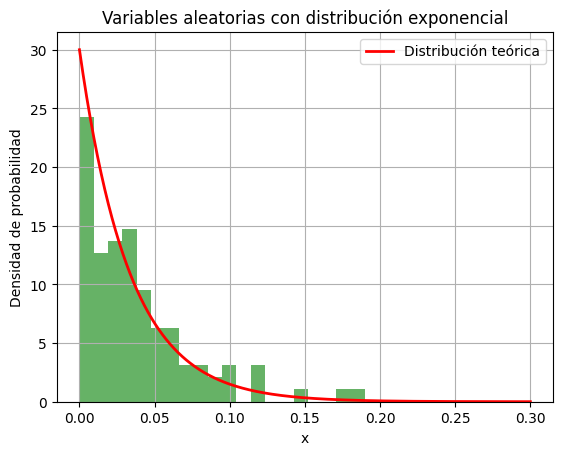

In [5]:
#Creacion de variables aleatorias de llegada
n = 100

# Generar n números aleatorios uniformemente distribuidos en el intervalo [0, 1)
uniform_randoms_Ri = np.random.uniform(0, 1, n)

exponential_randoms = -1/30 * np.log(1 - uniform_randoms_Ri)

print("Las primeras 10 variables aleatorias con distribución exponencial:")
print(exponential_randoms[:10])

# Histograma de las variables generadas
plt.hist(exponential_randoms, bins=20, density=True, alpha=0.6, color='g')

# Graficar la distribución teórica
x = np.linspace(0, 0.3, 1000)
pdf = 30 * np.exp(-30 * x)
plt.plot(x, pdf, 'r-', lw=2, label='Distribución teórica')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Variables aleatorias con distribución exponencial')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df_llegada = pd.DataFrame(exponential_randoms, columns=['TEA'])

# Mostrar las primeras filas del DataFrame
print(df_llegada.head())

        TEA
0  0.019817
1  0.041777
2  0.011111
3  0.008627
4  0.008942


In [10]:
df_llegada['Tiempo_Arribo'] = df_llegada['TEA'].cumsum()
df_llegada.head()

,TEA,Tiempo_Arribo
0,0.019817,0.019817
1,0.041777,0.061594
2,0.011111,0.072705
3,0.008627,0.081333
4,0.008942,0.090274


In [11]:
df_llegada.to_csv('tiempo_de_arribos_Llegada.csv', index=False)

# La Gran Rampa

In [12]:
#Generacion tx con que es mayor a f(x) en todo momento 
tx=0.9

#Creacion de funcion f(x)
def fx(x):
    
    if x >= 0 and x <= 2: 

        resultado= (3/4)*(x**2)*(2-x)

    else:
        resultado="Fuera de rango"

    return resultado


Punto Maximo


![](Desmos.png)

In [14]:
fx(1.33333)

0.8888888888722223

In [ ]:
def creacion_x(x):


    
    return resultado


 **Recordemos el metodo de aceptacion y rechazo:**

$$ r(x) = \frac{t(x)}{c} $$

  **Donde C es el area bajo la curva de la funcion t(x)**

  
  Pues sabemos que tiene altura 0.9 y ancho 2, sabemos el area bajo la curva para un rectangulo
$$ c = \int_{-\infty}^{\infty} t(x) \, dx $$

$$ c= 0.9 \times 2 = 1.8$$





$$ r(x) = \frac{0.9}{1.8} = 0.5 \quad  \quad 0 \leq x \leq 2 $$





  **Ahora calculamos $F_R(x):$**

$$ F_R(x) = \int_{-0}^{x} r(x) \, dy = \int_{-0}^{x} 0.5 \ dy = 0.5x $$

  **Despejamos x para obtener la funcion inversa:**

$$ x = F_R^{-1}(u_r) = \frac{u_r}{0.5} = 2u_r \quad 0 \leq u_r \leq 2$$
  


In [ ]:
def aceptacion_rechazo(x):
    #Generar X ~ U[0,1]
    U = np.random.uniform(0,1)


